<a href="https://colab.research.google.com/github/namoshi/ml_intro/blob/master/poly_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 汎化性（サイン関数の多項式回帰）

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def y(x, W, M):
    Y = np.array([W[i] * (x ** i) for i in range(M+1)])
    return Y.sum()

#(1.2),(1.122),(1.123)
def E(x, t, M):
    A =np.zeros((M+1, M+1))
    for i in range(M+1):
        for j in range(M+1):
            A[i,j] = (x**(i+j)).sum()

    T = np.array([((x**i)*t).sum() for i in range(M+1)])
    return  np.linalg.solve(A, T)

データの生成

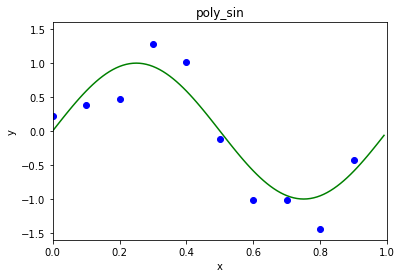

In [3]:
#Sine curve
x_real = np.arange(0, 1, 0.01)
y_real = np.sin(2*np.pi*x_real)

##Training Data
N=10
x_train = np.arange(0, 1, 0.1)

#Set "small level of random noise having a Gaussian distribution"
loc = 0
scale = 0.3
y_train =  np.sin(2*np.pi*x_train) + np.random.normal(loc,scale,N)

plt.plot(x_real, y_real, 'g-')
plt.plot(x_train, y_train, 'bo') 
plt.xlim(0.0, 1.0)
plt.ylim(-1.6, 1.6)
plt.title("poly_sin")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('poly_sin.eps')
plt.show()
plt.close()

多項式回帰モデルの当てはめ（M=0,1,3,9)

W
 [-0.06326939]


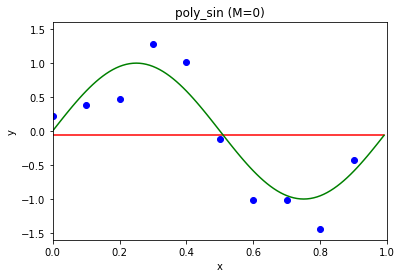

W
 [ 0.86868998 -2.07102082]


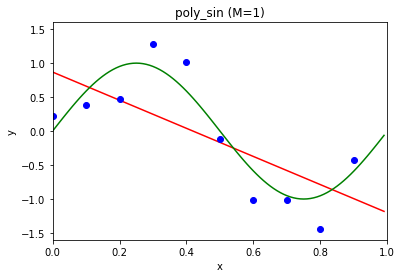

W
 [ -0.12264744  12.50980239 -38.21042274  26.2712961 ]


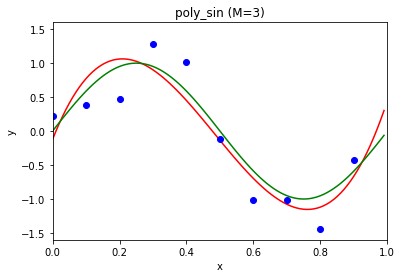

W
 [ 2.20309682e-01  5.68943577e+01 -1.27821445e+03  1.11438990e+04
 -5.01492040e+04  1.33387490e+05 -2.21527683e+05  2.27359592e+05
 -1.32025892e+05  3.30773229e+04]


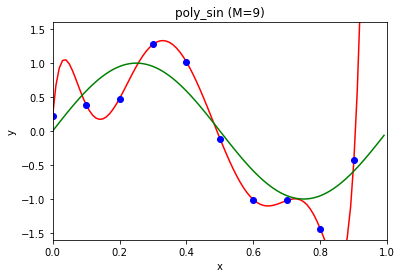

In [4]:
for M in [0,1,3,9]:
    W = E(x_train, y_train, M)
    print('W\n', W)

    y_estimate = [y(x, W, M) for x in x_real]


    plt.plot(x_real, y_estimate, 'r-')
    plt.plot(x_train, y_train, 'bo') 
    plt.plot(x_real, y_real, 'g-')
    plt.xlim(0.0, 1.0)
    plt.ylim(-1.6, 1.6)
    plt.title("poly_sin (M=%s)" % M)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.savefig('poly_sin_%d.eps' % M)
    plt.show()
    plt.close()